In [1]:
import numpy as np
import mplhep as hep
import uproot 
import matplotlib.pyplot as plt
import hist as h
import awkward as ak
import pandas as pd

In [11]:
from keras.models import Sequential, Model
from keras.layers import Dense

In [12]:

# Define the linear autoencoder model
model = Sequential([
    Dense(2, name='representation', input_shape=(1,)),
    Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])


/n/home02/jbassa/anaconda3/envs/scikit-hep/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# link (https://opendata.cern.ch/record/7730) (https://opendata.cern.ch/record/7730/files/CMS_MonteCarlo2012_Summer12_DR53X_DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball_AODSIM_PU_RD1_START53_V7N-v1_20001_file_index.txt)

files = """root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0042E29F-9FD0-E211-8849-001E67397BC5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00563E2A-CDD0-E211-AACA-002481E14F90.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00955D1C-1DD1-E211-8C95-003048D476C2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00AA83CA-8ED0-E211-B40E-003048D45F98.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00F149A8-11D1-E211-9000-002590200AE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00F76143-54D0-E211-A336-002590200A54.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0238720F-17D0-E211-AFA7-003048D45F30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0244BFB9-09D0-E211-B336-003048D460A8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/02719A20-8BD0-E211-8F99-003048673E86.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/027C220E-88D0-E211-87BE-0025B3E05C24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/02879676-CDD0-E211-94DA-001E67397008.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/02F42BF4-C0D0-E211-A5D2-003048673F7E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/045E547D-AECF-E211-AD06-003048D46084.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0470303F-B7D0-E211-AF5E-00304867098C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/04AF4093-37D0-E211-BFE5-0025902008A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/04B69F7D-C4CF-E211-B45A-001E67397D5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/04C5247A-C4D0-E211-9153-001E67396E1E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/04E4C53D-BED0-E211-83B3-001E67398DE5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/04F7C5AB-14D1-E211-A94F-001E67398520.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/060CD316-77D0-E211-A1E0-001E67396617.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/060F2BFC-FFCF-E211-9BBB-001E67397F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/062D924F-9AD0-E211-B5E5-001E673983A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/065C5AB9-84D0-E211-872A-001E673972E2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/06B8924D-98D0-E211-9761-001E6739665D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/06C43595-65D0-E211-94EF-001E6739687E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/06FC3D0E-29D1-E211-AAD8-002590200918.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0861EC72-5FD0-E211-BB6C-D8D385FF4B32.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0865DD63-10D0-E211-AD1E-002590200B0C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/087E8D31-9CD0-E211-9659-002590200AF4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0889B935-16D0-E211-BE92-001E67396E05.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0A08E71C-30D0-E211-8085-001E67398E49.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0A1EC2FD-6CD0-E211-93C5-001E67398E62.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0A4FE14D-9FD0-E211-8A72-0025B3E06658.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0A5326FC-D9D0-E211-9C61-0025902008B8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0AA0C1C0-7DD0-E211-A9D6-002590200B6C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0AF77CFE-F6CF-E211-BD7A-003048D45FC6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0AFDBDC1-0FD0-E211-A11D-002590200868.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0C04D73F-ABD0-E211-84E4-001E67398C05.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0C308BE5-8ED0-E211-9E5A-003048D460AC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0C4AB826-FCD0-E211-B3D4-002481E14F20.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0C56FDCC-BACF-E211-9D81-003048D476D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0C8DD3A6-EBD0-E211-8861-002590200914.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0CC2B094-18D1-E211-99FA-001E67397F35.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0E1B8FDF-49D0-E211-95B7-003048D477A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0E324FE1-C6CF-E211-918E-002590200814.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0E3726D4-FBD0-E211-A9D5-003048D476AE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0E40FEF6-F8CF-E211-83B1-003048673F2C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0E63BB82-E1D0-E211-8F0E-003048D4DBFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0E852C3D-58D0-E211-8645-001E673968F1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0EA1AE3E-22D0-E211-B41B-001E67398412.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0ECA5DCB-1CD0-E211-87C8-001E67398412.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0ED21EC2-D4D0-E211-BF55-003048D47766.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0ED79E35-C8D0-E211-9870-003048D476A8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/101E4CF9-27D0-E211-9E05-001E673974EA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1025E947-3AD0-E211-A366-001E67397238.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/102A5EF2-10D0-E211-B540-001E67397F71.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/104E6005-AAD0-E211-8D33-001E67396905.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10608503-57D0-E211-82A8-001E6739670C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10757ABF-B8D0-E211-9A53-0025902009C8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10D6E11D-C4D0-E211-A719-0025B3E06394.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10D74DED-E2CF-E211-9DC9-002590200B10.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10D7EECD-1FD0-E211-AD55-001E67398C05.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10D9A8CE-BDCF-E211-8ED9-002590200B78.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/10FCE82C-38D0-E211-828E-001E67397D91.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1209C68B-15D0-E211-B990-003048D47798.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1238A39A-D2CF-E211-AA3B-003048D46066.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1257A8ED-46D0-E211-9D0B-003048D47A56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/128BC5C2-1FD1-E211-AA23-001E67397580.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/12BC0B31-EAD0-E211-BD51-003048D4607A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/12C50109-0AD0-E211-88C8-003048D46054.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/12D4DC3D-F0CF-E211-87A4-002481E14C8A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/144FAFE8-63D0-E211-8547-001E673973C8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/146E1CC6-DBD0-E211-9DE1-003048D47A2A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/14B36470-09D0-E211-B4B8-0025902008CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/14CE7E7C-72D0-E211-AA1E-003048D45F2C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/14D33EBB-3CD0-E211-BE60-001E67398C5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/14D3DB3D-0ED0-E211-A32C-003048D47766.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/14F3D94C-6DD0-E211-B1F6-001E6739723D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/16180F98-FDCF-E211-8A1D-001E67397CB0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/165064AC-4CD0-E211-ADE5-0025B3E064F8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1651A10F-F2CF-E211-8E7F-002481E14F38.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/16640DA1-04D0-E211-BF4E-002590200850.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/16E08878-EACF-E211-92D0-003048D47A40.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/181223ED-1FD0-E211-9D9C-001E673973D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/182106B1-9BD0-E211-938B-001E67396E64.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1842D2CD-D7D0-E211-BA7F-0025B3E06612.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/189E8AA9-CED0-E211-8000-003048D4610E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/18B604E0-BAD0-E211-92C6-003048D47A1E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1A41095A-0ED1-E211-B558-001E6739825A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1A462275-9ACF-E211-8ADA-001E67397AD0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1A538910-94D0-E211-80FC-0025902008EC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1A7348A3-BDD0-E211-8E0B-003048D46068.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1AD0503E-CCD0-E211-9BCB-002590200900.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1ADC8CDD-CCCF-E211-931A-001E67397F71.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1AEC403B-91D0-E211-AB46-001E673984FD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1C63B0F8-DCCF-E211-AB34-002590200878.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1C6617FE-9ED0-E211-8394-0025902009D8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1C795ED1-08D0-E211-BBB8-001E67397035.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1CB70FE6-63D0-E211-9828-001E6739665D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1CBE4452-07D0-E211-8137-001E67396C52.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1CEBFEF6-E8D0-E211-940C-001E67397E1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1E509B9C-FACF-E211-9AB6-001E67396DB5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1E5ADE03-AAD0-E211-BF97-003048D476BC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1E9AA195-1ED1-E211-9406-0025902008AC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1EA77CB6-52D0-E211-AEBD-003048D45FE8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1EACD802-69D0-E211-8DD9-001E67397756.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/1EF9ED43-F8CF-E211-A217-001E67396A1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/200DF30D-FACF-E211-AC24-00237DE0C1E2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2011A55D-17D0-E211-B8B3-003048D47768.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/202807A4-CFD0-E211-A564-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/20363FA2-12D1-E211-9757-0025B3E0653C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/20392272-D0D0-E211-ADFF-001E6739830E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2045DD8C-1CD0-E211-8041-0025B3E05CE4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/209AD23D-4ED0-E211-B509-002590200B08.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/20D67172-02D0-E211-81C1-003048D47A6A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/221CDD64-A8CF-E211-A4C4-001E673968A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/221EC601-E3D0-E211-8397-003048674010.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2222DFDD-F3D0-E211-9C5B-002590200ABC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2232A7B7-97D0-E211-BC13-0025B3E05DFA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/223BC630-19D1-E211-AA8B-001E67396653.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/22453152-74D0-E211-837E-001E67396897.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/22606FE3-FDCF-E211-8777-001E67396C9D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2270EE9C-0AD0-E211-9F2E-0025B3E06698.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/22934F07-EFCF-E211-B16D-002481E14C8A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2294794B-FDCF-E211-9570-001E67396707.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/229A3549-1ED1-E211-B7DF-003048D47752.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/229A6FD4-A5CF-E211-8536-001E67398E6C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/22A935B6-39D0-E211-A41E-001E67396FD1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/22B64593-2BD0-E211-9726-001E673968BA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/22CFA1C7-CDCF-E211-A30E-001E673986B5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/240B8489-18D0-E211-9970-001E67397E13.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/241940A6-27D0-E211-9EB8-002590200AE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/242BE095-71D0-E211-9C1C-001E673972AB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/246BCE11-77D0-E211-A6C0-001E67397099.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24789850-C6CF-E211-9520-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24830960-9ED0-E211-9C04-002590200B0C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2492A023-B3CF-E211-9731-0025B3E05DCA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24B7568B-65D0-E211-9C12-001E67396617.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24B8CAF5-B2D0-E211-8E34-003048D479D6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24CF88B2-DFD0-E211-9F20-002590200A98.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24D7C3CD-72D0-E211-A97B-001E67397E1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/24E461EE-0FD1-E211-9B3F-002481E154EC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/26026AB9-A9D0-E211-BBD6-003048D45FF4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/260FF70A-0ED1-E211-B3F5-001E673984FD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2628A46E-D6CF-E211-B3D4-001E67396C9D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/262F80E9-D2CF-E211-ACE5-001E673972C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2631A726-80D0-E211-8425-002590200918.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/26A54517-73D0-E211-9200-001E67397099.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/26D9AE4D-C7D0-E211-B1F0-0025B3E05C24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/280544E8-9BD0-E211-8D67-003048D46006.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2821791E-F1D0-E211-AF6F-00304866C47A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/282CAD37-49D0-E211-84AF-003048D4601C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2870A427-4BD0-E211-BD01-D8D385FF4A7C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/287C3FA9-27D0-E211-B20B-002481E14E58.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28937CDC-B9CF-E211-AC87-001E673973E1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28969FB5-4BD0-E211-B358-001E67397314.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28CA7172-D4CF-E211-9C94-003048D46054.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28D65E20-E2CF-E211-B442-003048D4601E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28DB94AA-E5CF-E211-85A4-001E67397053.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28DD7C5A-D2D0-E211-94FD-003048D47824.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/28E1F12B-ACCF-E211-91E3-001E673973C8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2A07D1B5-74D0-E211-BDB0-001E67398A43.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2A2EFCC7-47D0-E211-AE0B-003048D45F92.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2A9638E5-A4CF-E211-BA62-0025902009E4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2AB72184-D7D0-E211-BE5A-002590200AE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2ABB1214-D5D0-E211-94AE-002481E15070.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2AC1AAED-0CD1-E211-BC33-001E673969D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2AD2E10C-56D0-E211-A446-002590200B64.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2ADCE074-26D0-E211-BC6C-001E67397CCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2AF7C7E9-F0CF-E211-8A8B-001E6739726F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2C0756FA-A3D0-E211-8FB8-002590200B7C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2C2BBD28-0DD1-E211-824D-001E67396C9D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2C53F14A-A3D0-E211-99F1-001E673976ED.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2C6B3FE3-12D1-E211-A6B1-001E67397233.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CBF3B5C-AFCF-E211-85E2-001E673987D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CC015B5-B1D0-E211-8B16-001E67397CB0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CC4D08B-FDD0-E211-8D53-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CE7340E-81D0-E211-905C-001E67397233.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CEF705D-1AD1-E211-A24C-001E67398E62.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CFCE384-19D0-E211-8BAD-001E67397D91.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2CFD651F-D8D0-E211-94EA-001E67396C9D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2E7152A2-ADCF-E211-8893-0025901248FA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2E9FCF09-36D0-E211-8677-001E67396928.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2EBBB12B-6BD0-E211-9BD9-001E673982E6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2EBBF120-DBD0-E211-B07B-003048D46028.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2EC2A615-11D1-E211-B33D-003048D45F7C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2EE3EECF-DED0-E211-82B1-001E67398633.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2EE639C7-67D0-E211-90AD-B499BAA2AC54.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/2EEBB757-BDD0-E211-87CB-003048D45FBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3044E915-2DD0-E211-9C14-001E67398223.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30542663-A6D0-E211-868E-001E673982E6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/305A4C3A-99D0-E211-AE4D-001E673972C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/305B2D3C-01D0-E211-A306-003048D45F98.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3063EF03-DDD0-E211-94C5-002481E154EC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30A2292E-44D0-E211-B3DA-001E67398408.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30A68C5F-56D0-E211-A110-001E67396568.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30A836A9-24D0-E211-B6B3-001E67396E05.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30ABA6E1-32D0-E211-A136-003048D462C2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30B9CAF0-AAD0-E211-A041-003048D47796.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30D8A736-23D0-E211-8F23-0025B3E066A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/30DF65FA-C2CF-E211-9CB4-002590200898.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/32245680-FBCF-E211-9C5C-001E67396A40.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3252083F-A7D0-E211-9227-D8D385FF4B32.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3257C793-8ED0-E211-9D5E-001E67398E49.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3269020D-8CD0-E211-827D-002481E0D6A0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/327EB580-D3CF-E211-8989-001E67396D56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3291FF30-8ED0-E211-A525-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/329A2A2C-FBCF-E211-A423-002590200B44.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/32AFE5B7-8FD0-E211-9089-001E67398390.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/32B24D90-05D1-E211-AD6A-0025B3E06448.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/32D06DFA-3AD0-E211-8288-003048D47A46.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/32F84408-00D1-E211-A6BE-001E6739730A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/340B6391-E0CF-E211-BA85-003048674048.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3413AFDB-19D0-E211-8E5F-001E6739672F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34497BBC-FED0-E211-9BA8-001E673972AB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34502491-3ED0-E211-B6B0-001E67398E12.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34618D80-BBD0-E211-9FFE-003048C8ECE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3462EE12-40D0-E211-8727-001E67397747.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34652B64-A9D0-E211-A16A-002590200A18.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34BFCDCB-4AD0-E211-B3BF-001E673968A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34D3CDB2-45D0-E211-B1F0-D8D385FF35C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/34D58623-29D0-E211-AF1E-001E67396DF1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/36041468-62D0-E211-BE54-001E67398C5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/360D9129-52D0-E211-8149-001E673969D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/36477B65-B1CF-E211-BF2F-003048D47758.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3699402A-D4D0-E211-BC35-001E673984C1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/369B5D39-28D1-E211-92E4-003048D4601C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/36A274BF-C0D0-E211-A4A1-0025902008CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/36AE7D33-92D0-E211-BB63-001E6739722E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/36C0C19C-50D0-E211-BAB8-0025901248FA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/381D722C-ACD0-E211-97BA-002481E14D46.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3840D173-A1D0-E211-8F55-0025901248FA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/385249A8-F7CF-E211-B572-001E67396F9A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3872C7FD-17D0-E211-903D-001E67396577.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3874D23F-19D0-E211-A036-D8D385FF4A7C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/38A2CA46-05D0-E211-B358-003048C8EC4C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/38AFBD36-FBD0-E211-89C0-003048D46296.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A0AF516-EBD0-E211-A8CF-001E67396BAD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A136B0B-5AD0-E211-AEFC-001E673966B2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A245968-BCD0-E211-A272-003048D45FBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A4AB740-42D0-E211-A745-002481E15270.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A5D2327-BACF-E211-9F21-003048670BCC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A8CBA89-7CD0-E211-A8C0-001E6739720B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3A97B41F-87D0-E211-B2A3-003048D479E0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3AD234ED-7BD0-E211-8A78-002590200898.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3C8EBD24-F9CF-E211-BACD-002590200AE4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3C920D56-8CD0-E211-A69A-001E6739670C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3C9293C8-10D1-E211-8A6D-003048673F08.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3CD83332-16D1-E211-812E-001E67398520.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3CDAF02C-26D0-E211-B87D-001E67396A09.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3CDD3FFA-E8CF-E211-8FF2-001E67398C1E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3CF1EF16-ADD0-E211-B95A-003048D47778.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3CFFCEEE-74D0-E211-8006-001E67396E28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E34C94C-C7D0-E211-ACC4-001E67397C33.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E35DB3B-43D0-E211-A2D7-001E6739732D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E3715F9-21D0-E211-93F4-003048D45F34.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E495B1F-8FD0-E211-8BCD-003048D462E2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E5EFAA1-03D0-E211-9414-002481E14D46.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E761DC1-D6CF-E211-8F0F-001E67397C33.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E7971D3-CBD0-E211-A335-003048D47A7E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3E942DB0-13D0-E211-B778-003048C8ECE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3EAFBF24-1AD0-E211-8082-001E67396AC2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3ED1E425-CDCF-E211-B46E-D8D385FF4A72.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/3ED64AB0-36D0-E211-AFD7-001E67397F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/400B6978-7DD0-E211-933F-001E6739713E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4055068F-89D0-E211-8E72-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/406DACEC-31D0-E211-B48D-002590200B78.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/40968225-13D0-E211-A151-001E67398CAA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/40FC9654-04D1-E211-AA8E-001E67396928.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/42012006-AFD0-E211-9215-001E67396CFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/420E6AA4-5AD0-E211-BCC2-001E67397D91.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4228B22B-67D0-E211-AA4B-002481E14C8A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4237F602-8DD0-E211-8B48-001E67397391.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/425A4C91-49D0-E211-9562-003048D47A30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4260C7DA-ABD0-E211-893D-001E67397C33.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4277B31C-62D0-E211-9ABC-002481E150DA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/429461D5-ECD0-E211-A77A-003048D4610E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/42A9917C-EDCF-E211-B6BC-001E673987D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/42ADD1F8-77D0-E211-B771-0025902009BC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/42D407C1-93D0-E211-99D6-001E6739677A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/42E472E3-00D0-E211-A454-002481E75ED0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4404C229-DBCF-E211-8FAE-001E6739713E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/44102562-BBCF-E211-98C0-002590200938.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/442989C2-F1CF-E211-854C-001E6739723D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/443A71D3-96D0-E211-AC5F-001E67397058.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/444E6581-2CD0-E211-8EE1-001E6739677A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/447BB98E-4DD0-E211-B7CF-003048D45F24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/44F26391-8DD0-E211-B6E9-001E67397233.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/460F4889-0BD0-E211-9D7A-001E6739811A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4612855C-48D0-E211-A792-001E673983F4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4688F866-13D0-E211-AB5B-003048D479D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/46F3C108-10D0-E211-A11C-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4808D73B-B0D0-E211-8F1D-001E67398BE7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/480D9A85-E4D0-E211-BE23-001E67398CB9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4812EF2E-96D0-E211-B43F-001E67398A43.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4817E4C8-D0CF-E211-8524-003048D45F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4832044B-36D0-E211-9F97-003048D476A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/48522BC8-80D0-E211-B0FE-001E673973D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/488BA1A5-B2D0-E211-B482-001E67396AC2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/48E79421-2ED0-E211-9442-001E673983F4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4A6F0AB0-FFCF-E211-8AA9-003048D45F60.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4A722830-A0CF-E211-8A7C-001E67397008.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4A845415-81D0-E211-9C36-001E67397C79.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4A86B49B-BCCF-E211-8980-003048D476B8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4A9BDDA8-70D0-E211-A590-001E673982F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4AB46F05-14D0-E211-8283-001E673975EE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4ADC2809-ADCF-E211-AD24-003048D4624C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4C0A7B43-54D0-E211-99A9-00259020093C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4C51CB8C-A0D0-E211-8020-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4C6A3AD6-51D0-E211-AEAF-0025902008B8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4C77E2AF-C8CF-E211-AA9C-001E67398CB9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4C7F8C50-3ED0-E211-8603-003048D4602A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4CAA3E00-C6CF-E211-8221-001E67398390.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4CC55275-67D0-E211-B959-001E67398CA0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E03288C-CCD0-E211-BD69-001E67398E12.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E068CA8-94D0-E211-97E4-002590200A30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E294309-B9D0-E211-9927-002590200914.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E42AD45-D7CF-E211-B672-001E67396C52.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E4EE8D3-F6D0-E211-BF31-001E67396D79.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E59E800-0BD0-E211-AF27-001E67396E3C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E6847DE-73D0-E211-81C8-0025B3E063E8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4E7F4998-1ED0-E211-B7CA-003048D45F5C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4EA97FB8-E4CF-E211-8BBC-003048670BCC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4EB1C5DD-3ED0-E211-9E80-001E67396A40.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4EBCC4CB-C4CF-E211-B077-001E67397A76.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/4EBFBB10-9ED0-E211-8017-001E67398C5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/500B49F1-DDCF-E211-943F-001E67396BA3.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5025B185-58D0-E211-AC77-0025B3E0654E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/50389757-60D0-E211-BC50-003048673F24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5042FA8A-BAD0-E211-8ECB-003048D4772C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/50B3CC19-7AD0-E211-8F6B-003048D46046.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/50B53B5C-0DD0-E211-8A8F-003048D45FC0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/50B7813E-5BD0-E211-9ACD-003048D4607A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/50DAC975-4AD0-E211-A1A3-003048D45FC4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/50EA040D-EBCF-E211-84CD-003048D460DE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5230878D-C3CF-E211-9128-001E6739707B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/523848E4-4DD0-E211-9D49-003048D45FE2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52629AFB-1DD1-E211-BE38-0025B3E06466.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52678910-C5D0-E211-B319-002481E14FCA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/528626DC-A2CF-E211-9EAC-001E673967C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52A2100D-DFCF-E211-BA6E-001E673972E7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52B5B3DC-B7D0-E211-BB40-001E6739672F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52B5DDA4-11D0-E211-9B77-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52BD609A-45D0-E211-A9F8-001E67398C5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52D2B48F-28D0-E211-A07C-001E67396707.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52EB0893-E9D0-E211-B43C-003048D47726.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/52FEA9FC-C1D0-E211-ACE1-00259020084C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5401DE60-CBCF-E211-BDA8-001E6739850C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/540DE996-64D0-E211-993F-001E67396D56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/54141C32-C7CF-E211-BD28-003048D460D8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5463E464-13D0-E211-8B86-001E67396568.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5463E4EB-6DD0-E211-89C3-0025B3E05BA8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/54A84AD4-F2D0-E211-BFBF-0025B3E06612.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5611F758-0BD1-E211-ABBD-00259020080C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/56123173-0CD0-E211-BE14-002481E14F8C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/56246832-3BD0-E211-A78F-001E67397F3F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/563EC24E-AFD0-E211-8CBD-001E67397F3F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5640719B-89D0-E211-B50F-001E673965FE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5642298E-BED0-E211-853F-002590200A28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5656AB49-D6D0-E211-84F2-001E6739850C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/566335E5-85D0-E211-B869-001E67398CA0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/56723C68-F7CF-E211-9AEC-003048D477C2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5683FD19-F6CF-E211-8074-003048D476F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5684FB03-03D0-E211-88F5-002590200A38.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/56B79AF5-07D0-E211-A399-002481E1501E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5852F2D7-DAD0-E211-8542-001E673966B2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/585C4E1F-D4CF-E211-826F-001E673968BA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/586FBBFD-24D0-E211-97CF-001E67396BA3.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5877AFD1-E6CF-E211-8574-003048D45F28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/58790F6F-87D0-E211-835D-0025B3E05DFA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/588EB453-01D1-E211-9EC8-0025B3E05DAC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/589D8356-5DD0-E211-938D-001E67396DBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/58AC242D-2CD0-E211-83B8-001E67397396.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/58C46D8D-5BD0-E211-95EF-003048D45FF8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/58EB4B26-09D0-E211-9449-0025B3E06400.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/58ED4767-B5D0-E211-BEC9-001E6739753A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/58F80143-A7CF-E211-89EB-984BE1089DFA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5A0D6B38-A4D0-E211-9035-0025B3E05C32.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5A4A8148-00D0-E211-83C6-003048C8EE54.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5A5C1B74-23D0-E211-A04C-0025B3E06516.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5A610FCA-38D0-E211-9CDE-001E67396ACC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5A7DC8A5-B9D0-E211-9846-001E67397E90.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5A97DE39-BED0-E211-AC64-003048D4606E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5AAF4D68-AACF-E211-BEB8-001E673972CE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5AB7CE47-82D0-E211-BC70-001E673974EA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5C0026FC-03D0-E211-906D-001E67397E1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5C0B301C-E8CF-E211-A00C-0025B3E06658.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5C3E777C-4ED0-E211-BFDE-001E673974EA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5C3F2D00-50D0-E211-9F5A-003048D4600A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5C5B6D83-DED0-E211-99BF-003048D45F5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5C7333E5-EFCF-E211-A333-001E67398052.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5CA5F433-BDCF-E211-A5EF-003048D47A80.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5CBAB872-FED0-E211-89D4-002590200B6C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5CC2372C-D8CF-E211-BD1F-001E67396892.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5E0EF61F-0FD0-E211-ADFF-001E67396E28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5E54C57D-C3D0-E211-A1FB-001E6739730A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5E746CA6-10D0-E211-95B7-001E67398052.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5E84BDA1-AED0-E211-8FF3-001E67397391.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5E850CF7-63D0-E211-A1B1-003048D4607A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5E931817-C0D0-E211-B1AD-0025902008E4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5EBEF688-7CD0-E211-A8D3-003048D47A28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/5EC247F2-AFCF-E211-9489-001E67397314.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/602631EF-CBD0-E211-9DF8-0025B3E05C7E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/602A3654-E6CF-E211-8889-D8D385FF35C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/602DAC7A-B4D0-E211-ACCE-003048D46006.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6050F9BE-23D0-E211-91BF-002590200898.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/607A3FCF-52D0-E211-8AA4-001E67396E7D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/607DECCE-43D0-E211-ACB6-001E67396685.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/607F2198-7FD0-E211-B4D9-003048D476FC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/60E2F03D-7FD0-E211-9EA7-003048D45F94.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/60F71CBA-26D0-E211-9D00-003048D4601C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62736CED-1BD0-E211-BFE5-001E67398223.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62756809-48D0-E211-8951-001E67397CC9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62A3D004-07D0-E211-A572-001E67397F71.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62ABBD6E-5CD0-E211-A6C4-001E67397CC9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62CF5EBE-E2D0-E211-89DF-0025902009A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62D4E414-06D1-E211-AF90-0025B3E05D76.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62DEAF2F-E4D0-E211-B396-001E67396577.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/62DEEF3F-49D0-E211-B38B-002481E150EE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/642F701F-3CD0-E211-89CD-001E67396905.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6440EA8F-95D0-E211-8DAC-001E67396A1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6446A008-02D0-E211-B236-003048D476E0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/647579B5-BBCF-E211-B036-001E6739732D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6478BC8F-5ED0-E211-B1E1-001E67396E64.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/648AB2A4-D2D0-E211-BFA6-0025902008CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/64A894F6-D6CF-E211-A7C6-003048D4603C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/64D9AC40-89D0-E211-9E6C-003048D47A40.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/64E83E6A-9CCF-E211-B99D-003048D45F60.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/660B77B2-A1CF-E211-A331-001E6739815B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/664108C4-EBCF-E211-96B9-001E67396897.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/664436EF-0BD1-E211-9808-001E67397CBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/664F1F76-55D0-E211-A084-003048D45F7C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6662B1FD-BFCF-E211-A576-001E67396E32.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66709CA6-26D1-E211-A104-003048673E70.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66A00495-14D0-E211-841E-002590200978.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66BC1DD2-9CD0-E211-BDB4-003048D4774E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66C7015C-3DD0-E211-9470-001E67397F71.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66D68201-35D0-E211-AA26-003048D476CE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66D77F97-00D0-E211-B7BE-001E673984C1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66DAE8BC-5FD0-E211-91D9-0025B31E330A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/66EC063D-46D0-E211-B53E-001E67396D6F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/681D40ED-65D0-E211-99F7-002481E150B6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6834D8EA-C2D0-E211-9190-003048D476E2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/68DF73F9-36D0-E211-B56A-0025B3E05C9E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/68F21B52-FAD0-E211-BB72-003048D46074.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6A2539F0-1ED0-E211-A00A-003048D4DBFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6A540337-1FD1-E211-B3ED-002590200970.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6A562A70-68D0-E211-A20F-0025B3E064F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6AA7B560-F6CF-E211-A79C-001E673966B2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6AE4D9B7-06D0-E211-AF05-001E67396D10.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6AED2E2B-3FD0-E211-A1D6-003048D4612C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6AFCEB97-2ED0-E211-BD30-002590200B64.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6C3A06D9-6AD0-E211-9DF4-003048D47A8A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6C448478-2FD0-E211-963E-D8D385FF4A72.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6C719BE8-DFCF-E211-9FAF-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6C725F4C-E9CF-E211-94A3-0025902008FC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6C8A882F-33D0-E211-9C17-003048D47A84.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6C92CBC6-FFD0-E211-BFA7-00259020081C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6CC4B5B2-EECF-E211-9D90-001E67397AE4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6CCE8A83-16D0-E211-9171-0025902008A8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E0E34DE-A7D0-E211-8C4A-001E673986B5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E1A19CA-2FD0-E211-BB2F-002590147CA2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E1E8800-21D1-E211-917A-001E67397E1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E2E960E-23D0-E211-8531-001E67397CAB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E7FE818-70D0-E211-872D-001E673965FE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E8816AC-41D0-E211-B7CC-003048D476A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6E937687-73D0-E211-9D9F-001E67397396.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/6EB12498-ECCF-E211-A724-001E67397035.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7000F132-EECF-E211-B6F9-001E673973EB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7009EA7C-BFD0-E211-B4FE-001E673967C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/700DFF35-16D0-E211-A4A0-0025902008C8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7023631C-A6D0-E211-B340-003048D47A30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7026BEF6-9AD0-E211-BEA5-001E67396581.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/706920CD-F2CF-E211-BEB4-001E67397F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/706EADCD-22D1-E211-80EF-001E672CC1E7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/70BD98D6-3FD0-E211-815D-001E67396581.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/70C4BD4D-5BD0-E211-9C8E-001E67398412.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/724FF699-3AD0-E211-8F07-003048D47A7E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7256B833-C3D0-E211-B41D-002590200900.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/725F82FA-56D0-E211-9D04-003048D47716.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/72744F82-E7D0-E211-AC89-002481E14FCA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/729483B5-97D0-E211-86F4-001E67398142.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/72A85032-FECF-E211-9589-001E67398011.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/74045F3B-B0D0-E211-A889-002590200B68.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/740991B3-10D0-E211-B473-0025B3E064F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/740D0176-E4CF-E211-AF79-003048D479D6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7416250A-DCD0-E211-8A0D-003048D47A14.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/74235DE6-EDCF-E211-9D80-001E67397C79.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/745FB0F4-04D0-E211-9680-001E67398D5E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/749933D9-8AD0-E211-AF0E-003048D46060.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/74A11221-B1D0-E211-8E50-0025902009CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/74C0A248-03D0-E211-A15B-001E67397E1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/761CEA6E-A5D0-E211-B2D2-001E67398A43.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/76340FC8-D8CF-E211-A53D-003048D4602E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/763C6D92-1BD0-E211-B856-001E67397D55.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/765528B2-B4CF-E211-8ADC-001E67397EEA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/765CD25C-C6D0-E211-AECC-001E673968A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/76B95672-9DD0-E211-9E00-001E6739751C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7806E7DE-0BD0-E211-BCBA-0025B3E064F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7829A471-A3CF-E211-A9A1-001E67396D56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7830D8AE-CBCF-E211-AEE5-001E6739687E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7863E972-1CD1-E211-988A-001E67398958.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7866DA86-0BD0-E211-945D-002481E15110.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/78A47955-50D0-E211-AE33-001E67398CAA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/78E830B1-44D0-E211-A49F-002590200984.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A23E0CC-96D0-E211-A679-001E673989FD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A2867F2-94D0-E211-ACC2-002481E150DA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A34C5D9-66D0-E211-8A42-001E67396D56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A444BD2-91D0-E211-ABDB-001E67397021.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A4AC055-D5CF-E211-992D-0025902008E4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A58159D-F3CF-E211-B7AB-003048D47724.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A7C516B-0AD1-E211-9A3E-002590200938.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7A9B0E28-13D0-E211-ACB6-001E67396973.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7ABD8F56-14D0-E211-B081-001E673976D9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7AC0D14D-41D0-E211-AE81-001E67396892.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7AF3F353-27D0-E211-9D82-003048D46038.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7AF9B39E-57D0-E211-81A4-002481E14C88.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7C2F3393-0FD1-E211-9FFD-0025B3E0651C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7C881791-24D1-E211-B0C2-001E673972AB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7CA5A1F9-23D1-E211-B26D-003048D45FB0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7CBD7D0E-35D0-E211-8C76-001E67397CBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7CCFC102-AED0-E211-BF9A-001E67397396.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7CDDF227-F5CF-E211-9BA3-001E673966B2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7E08A6F3-D9D0-E211-A595-001E67397E90.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7E2B3608-31D0-E211-A3E0-003048D45FB2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7E3B319A-61D0-E211-84AD-001E67398C5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7E448A4E-ABCF-E211-BBA0-001E67396CFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7E681336-DED0-E211-8990-001E673989DF.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7EB45EE0-BAD0-E211-A523-001E67398223.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7EBA894E-53D0-E211-BD8D-001E67397F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7ED5F57E-22D1-E211-B12C-003048D45F2A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/7EFB8C07-3DD0-E211-94B5-001E67396CFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/80258FA5-C5D0-E211-99AB-003048D479E4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/803350CF-A0CF-E211-9986-003048D45FE2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/803C0207-B8CF-E211-AA31-002590200AE8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/803D5BE3-F4CF-E211-8E90-001E6739751C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/808283B7-BCD0-E211-A04F-001E6739834A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/809F34DB-66D0-E211-A323-001E67396F9A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/80CBADD9-C3CF-E211-9E23-0025B3E05D76.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/80E81F31-A5D0-E211-A7E5-003048D47A52.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/80FC9D53-5AD0-E211-9E31-003048D47726.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8229A01C-06D0-E211-B995-0030486709B4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/822AEE8C-B0CF-E211-B035-001E67396653.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/823BAD9E-E2CF-E211-85CD-001E6739830E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/823EC872-09D0-E211-887F-002590200948.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/82C416B3-EFCF-E211-86F9-001E67396A1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/82DBB4B8-7AD0-E211-AB46-003048D460CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8436EC89-0BD0-E211-B450-002590200B14.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/845360B6-D5CF-E211-93DD-001E673975F8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/846F5319-17D1-E211-B424-003048D46024.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8470C251-2ED0-E211-80DC-003048D47A08.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/84F3DD14-03D1-E211-B33F-001E67396D42.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/86260266-E5D0-E211-82EF-001E67396775.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/865A1DB1-DCD0-E211-AFA9-001E67396577.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8660DE8A-DDCF-E211-95D0-003048D45F52.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/86658DB9-59D0-E211-8A2C-002590200914.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8678F582-79D0-E211-AF9C-001E67398142.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8801665E-25D0-E211-B308-0025B3E05C24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/88111094-F8D0-E211-BF27-0025B3E0651E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/881137B5-B5D0-E211-9482-003048D47784.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/882CB550-36D0-E211-9D5A-001E6739687E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/883E664C-FACF-E211-BC70-001E67396E28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/884383A3-F3D0-E211-92BA-002481E150FC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/884AC254-D9D0-E211-BCC7-001E67397CB0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/888C0266-ECCF-E211-806C-001E673975EE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/888E05A8-0ED0-E211-A311-003048D45FF8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/88920590-B3D0-E211-8061-0025B3E05D44.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/889AD08E-05D0-E211-B12B-002590200838.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8A0B2CCA-CDD0-E211-813C-001E67398C1E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8A3AE5B6-C6D0-E211-8F1C-002590200A1C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8AE4313B-A1D0-E211-8DB8-0025B3E06612.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8AE4F6D3-F8CF-E211-A1A1-001E6739713E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8AF69567-4FD0-E211-BD91-0025B3E05CF6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8C0E1016-B2D0-E211-9BB6-001E67396E3C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8C182B96-08D0-E211-B6FB-002590200A30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8C49223D-66D0-E211-82D1-003048D46002.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8C580E9E-9BD0-E211-9F8C-001E673972CE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8C672C5B-F3CF-E211-903C-002481E15000.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8C9EB7DC-B3D0-E211-B191-001E6739732D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8CAC8A8B-C9D0-E211-8C42-002590200AE8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8CFE1EF4-F3CF-E211-9AFA-0025902009E8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8E09FD16-FFCF-E211-8425-003048D45FAC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8E3E48ED-98D0-E211-8013-002481E154EC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8E598B52-9FCF-E211-B8C8-001E6739751C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8E710D33-83D0-E211-ABB0-003048D460BC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/8EA78A22-B8D0-E211-81A6-003048D4772C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9029AFB7-20D0-E211-B34C-0025902008AC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/907AD51B-1DD0-E211-B33E-001E67397701.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/908DE02D-BFD0-E211-A2BC-003048D4606E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/90B4AA84-F0CF-E211-8454-001E6739720B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/90C0E4DF-FECF-E211-95D1-002481E14E82.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/90DCAC04-0AD0-E211-95CB-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/90FC2382-59D0-E211-86E1-003048D47752.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/92127A3C-5ED0-E211-9BD5-003048D462C6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/923E324D-AFD0-E211-B6DB-001E67397B25.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9253D8EE-F3CF-E211-8907-003048D46056.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/925CF10E-A2D0-E211-A55A-001E67397431.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/92632024-1BD0-E211-A0FF-001E673984C1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/92917762-F7D0-E211-B884-003048D46026.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/92B11867-A6CF-E211-8A2D-0025B3E06510.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/92C7EEBF-60D0-E211-87CB-001E673983F4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/940C147A-DFD0-E211-9229-0025B3E06388.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/946EDF1E-08D1-E211-ABE6-001E673969D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9470583A-A4D0-E211-ABCA-0025B3E05D68.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/947AC892-22D0-E211-9426-001E67397E13.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9499C49E-69D0-E211-8225-002481E1510C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/949D3622-84D0-E211-8BF1-003048D460B6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/94A31615-F2CF-E211-B974-001E673983A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/94C11BC3-99CF-E211-94EB-002590200844.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/94C54739-7FD0-E211-AC73-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/960CAC28-01D0-E211-9FE2-001E67397215.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/960D2DF8-E5D0-E211-929A-003048673F2C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/966EA968-FCD0-E211-87C3-0025B3E06466.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/96858B29-C1CF-E211-99BE-003048D46054.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/96A2ED2E-F0D0-E211-BDD6-001E673968F1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/96AD7A59-7ED0-E211-B8D1-0025B31E3C0A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/96F025C6-B4D0-E211-A235-001E67396DF1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/988AC26A-3CD0-E211-A445-001E67398BE7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/988ED7C1-D0D0-E211-9D81-002481E75ED0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/98905996-32D0-E211-9B44-002481E100DE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/989E5ECC-ACD0-E211-954B-003048D47756.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/98A7B363-6CD0-E211-BA3C-003048D47A8A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/98BBB82D-0CD0-E211-8F45-001E673986A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/98FD7274-F0D0-E211-89A5-001E673967C0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9A3680DC-B3D0-E211-B70D-00304867407E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9A66D1D4-1BD1-E211-ACB2-001E67397233.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9A774716-26D1-E211-BC9E-003048C8ECE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9A788C9C-1ED0-E211-A04E-001E67397CC9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9A966CEC-B6D0-E211-96D6-00259020081C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9AF636D9-3BD0-E211-A6C0-001E673989FD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C0517AC-81D0-E211-BF55-001E67396CFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C20E065-2AD0-E211-8C26-003048D45F7A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C25E6E6-57D0-E211-8DC3-001E67397053.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C2D6CDD-ABCF-E211-9B79-001E6739722E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C31829E-DACF-E211-9F48-001E673967C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C3377B5-6CD0-E211-BF6F-001E67396DF1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C767D78-1AD0-E211-B3A6-001E67397F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C8857E3-90D0-E211-8089-001E67396DF1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9C90F8D1-8AD0-E211-9314-001E67396A8B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9CA983D4-61D0-E211-81B4-00259020083C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9CECE7F4-21D0-E211-8655-002481E14D84.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9E2CAE39-75D0-E211-AF07-001E67397021.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9E2E6332-CFD0-E211-BD6F-0025B3E06698.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9E4504DC-EFD0-E211-9F5A-0025B3E06612.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9EBF76D0-E1D0-E211-949D-001E67397003.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9EDADBE5-2ED0-E211-BFEE-0025B3E05D0A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/9EDBBE28-A8D0-E211-AC66-003048D46046.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A010B745-B2CF-E211-ABFC-001E67397B11.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A015B5C1-E7CF-E211-9EBC-0025B3E05DDA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A02BB20F-90D0-E211-98E1-002481E14F8C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A03D2FDE-09D1-E211-9F51-001E67396775.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A07E8508-A4CF-E211-9F10-001E67397620.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A07EDBB5-40D0-E211-8DFE-003048D45FC4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A0B55774-01D0-E211-B38D-001E673972C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A0FC4BA9-18D0-E211-AAD9-002590200B10.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A2147F3E-86D0-E211-9DA3-0025902009E8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A224FB03-2BD0-E211-9D09-001E67397756.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A2360EBC-02D0-E211-8F5A-001E67397238.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A265F62C-CAD0-E211-9961-001E6739850C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A2C3AEF9-0ED1-E211-A4BB-002481E14E56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A2E9CB4A-FDD0-E211-AF1C-001E6739675C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A2F8AAF4-4CD0-E211-B673-001E67398683.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A4027689-9BCF-E211-A00E-003048D45F28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A41B4929-09D1-E211-9ECF-003048D4610A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A41BC90C-7ED0-E211-A5D6-0025B3E05D3A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A42AA311-E5D0-E211-8CA6-001E673973C8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A446CA95-46D0-E211-93AA-0025B3E063CA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A489AE37-A0D0-E211-949E-0025B3E0658E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A49CF2D6-5ED0-E211-816A-002590200988.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A4D46E62-F2CF-E211-8267-001E67396761.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A664CA5D-31D0-E211-8322-001E6739702B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A6AD497E-43D0-E211-955E-001E67398228.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A6B81562-23D1-E211-BF72-001E67397314.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A82E15CC-33D0-E211-A00B-0025B3E063AC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A8454B60-24D1-E211-AAB8-001E67398CB9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A87471CD-02D1-E211-9E5E-0025902009CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A8CAFEE5-E9CF-E211-852C-001E67397021.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/A8E16AC0-17D1-E211-9374-002590200874.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AA0FECAB-0DD0-E211-8139-001E673969FA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AA36EFED-41D0-E211-B3B0-001E67396E32.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AA50E491-01D1-E211-B4A7-00259020081C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AA648EA9-E6CF-E211-AED6-003048D47736.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AA757F71-76D0-E211-BF32-001E67397396.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AAAAB583-16D1-E211-977C-001E67397F8F.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AAB71D0C-4CD0-E211-B360-001E67397CCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AAFC0897-08D1-E211-BB64-003048D45F80.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AC3059B0-41D0-E211-9102-001E67397CB0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AC312AC1-77D0-E211-AFEB-003048D476DC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AC3D2B53-4CD0-E211-907B-001E67396D56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AC470E81-86D0-E211-9A4D-001E673968A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AC6EFE50-9AD0-E211-879A-0025B31E3330.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/ACCBE519-97D0-E211-BCE8-003048D45FD2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/ACDE7F29-76D0-E211-B642-003048C8ECE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AE15365F-D9CF-E211-B6CC-003048D45F8A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AE2591F4-37D0-E211-B516-0025902009B0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AE367161-06D1-E211-A991-002481E15070.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AE54B080-3FD0-E211-B060-001E67397053.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AE7BF29E-12D0-E211-9958-002481E1511E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AE7EB07F-1FD1-E211-971C-001E673985E3.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AEA0D35E-74D0-E211-9E1D-001E673987D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AEA3D560-DCCF-E211-9544-001E6739723D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AEAAEEC9-6BD0-E211-BE9B-D8D385FF17DC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AEB3E67E-38D0-E211-B461-001E67398E6C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/AEF66A0A-45D0-E211-8F75-003048D4600A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B0C467ED-94D0-E211-BA55-001E6739830E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B0DE3AE2-FDD0-E211-A69F-001E67398CAA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B0F8F2DF-42D0-E211-BE24-001E67397314.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B239CA25-6FD0-E211-8B20-0025902008DC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B25164A4-07D0-E211-97A3-003048D4602E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B2991C72-9ECF-E211-863B-001E6739665D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B45D40F6-70D0-E211-9638-001E67396A22.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B4B586FF-EBD0-E211-8950-001E673966B2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B4B8F387-80D0-E211-AE83-0025902009B4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B4BA664B-57D0-E211-8276-003048D45FFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B4C4D2A3-88D0-E211-9E99-001E67397616.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B4EF7FBD-55D0-E211-9E03-001E67398011.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B6DCDA7F-FECF-E211-94CB-002590200868.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B6EC194C-DDD0-E211-BBC9-002590200A54.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B8142EC0-30D0-E211-B519-001E673972E2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B81ED42F-1FD1-E211-A67D-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B82C012D-EDCF-E211-80FB-001E6739753A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B8641909-FDCF-E211-A225-9C8E991A143E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B8876528-55D0-E211-B277-003048D45FC6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/B89E7622-47D0-E211-9C64-003048D460F6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BA30B3C5-13D1-E211-A0DD-003048D47A4C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BA3926ED-11D0-E211-A5F1-001E673982E6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BA832BB4-2DD0-E211-B354-001E673967C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BAB45540-D7D0-E211-921F-003048D460F2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BAB8212A-FBCF-E211-90A4-0025B3E0658E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BABE1F37-58D0-E211-9691-002590200A98.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BAE1F900-69D0-E211-9586-003048D47A2A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BC106E23-FCCF-E211-A324-0025902009C0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BC43D767-39D0-E211-9613-0025B3E06378.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BC69DFEE-F1D0-E211-8ABE-002590200874.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BC6E8F02-07D0-E211-BE6C-003048D476C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BCFE8EFF-97D0-E211-AB02-003048D476FA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BE2B52E2-54D0-E211-B33B-001E67396928.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BE3FD8FA-14D1-E211-9782-001E673983F4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BE4A2964-1DD1-E211-8A51-003048D47A64.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BE54D75D-07D1-E211-8BF0-003048D45F98.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BEB331C1-8BD0-E211-900A-001E673969FF.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BEB657A1-F5D0-E211-87AB-001E67396D51.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BEB767CA-2FD0-E211-B60F-003048D47A18.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BEB7F70A-B5CF-E211-9DD2-001E67398408.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/BEF1D9A3-E0D0-E211-A0EE-001E6739850C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C0264210-3AD0-E211-B577-003048D46040.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C03DBCF8-60D0-E211-8387-001E67398E49.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C04E6599-00D1-E211-B8EB-001E67396653.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C0602E20-59D0-E211-ADC6-003048D45FF8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C0A61ED8-83D0-E211-BED1-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C0ABCC75-47D0-E211-ADB8-001E673986A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C2080638-E7D0-E211-8C96-002481E0D6A0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C21BC74C-04D0-E211-AF4A-003048D4603A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C228ED59-78D0-E211-9063-001E67397058.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C2359DA6-BFCF-E211-B96D-003048D45FE4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C24F2B10-03D0-E211-85AD-002481E14F1E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C270FAFF-63D0-E211-ADF0-001E67397B11.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C27AA600-A3D0-E211-B0C0-003048D479E4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C28414EC-EFCF-E211-8649-001E673983A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C2D1C33E-19D0-E211-A3A8-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C2FD19BD-F4D0-E211-9D02-0025B3E064AE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C44FD229-F9D0-E211-B151-001E67396A40.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C49D4442-1BD1-E211-BE4E-001E673985E3.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C4D800E4-C9CF-E211-A2EA-001E67396A40.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C4F7DC67-EBCF-E211-B4D0-001E673971C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C60C23CC-79D0-E211-AB3A-001E67397CBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C62E3435-CACF-E211-BC3E-0025B3E0656C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C653419F-69D0-E211-B99D-002481E72E80.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C659E3BA-87D0-E211-9D1A-003048D479DA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C6A6257C-55D0-E211-A66F-0025B3E05BA8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C6D23E96-82D0-E211-875A-0025B3E06528.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C6DE76D3-5BD0-E211-B865-001E67396707.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C8D64BD3-6ED0-E211-9C2E-001E67398520.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/C8EE44CA-BBD0-E211-9C3B-00259020080C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CA060CBA-1DD0-E211-BDE8-003048673F24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CA27A44B-64D0-E211-8455-001E67396A8B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CA68B8C0-B3CF-E211-B407-001E673972CE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CA820AC3-D0D0-E211-9E9A-002590200B10.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CAE916AF-D5D0-E211-8492-001E67397391.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CAEB74C6-F5CF-E211-9CB5-002481E14FFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CAEF5C87-CAD0-E211-B3A7-003048D47A52.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CAFF7349-37D0-E211-B7CD-003048D4604E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CC32CA9A-BFCF-E211-A8A0-003048D45FF2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CC8E58A4-E3D0-E211-83FF-003048C8ECE0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CC931E70-20D0-E211-A7CD-003048D45FD2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CCDC4771-34D0-E211-BA6E-001E67396D79.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CCFE27FF-62D0-E211-AFB7-002481E75CD2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE166EF9-EED0-E211-B5C1-001E67396FA9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE1CFDE5-3BD0-E211-8541-002590200A30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE225AB5-18D0-E211-9C92-0025B3E05C24.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE22DDA0-9AD0-E211-81F7-001E67398BE7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE29F731-D0CF-E211-B388-001E673967C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE2A3248-C9CF-E211-84F7-001E673972DD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE394578-D1CF-E211-B8EF-001E67398D72.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE39C94E-EFCF-E211-883B-003048D45FF4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE55539D-6DD0-E211-BB31-001E67397751.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE61C7AA-20D1-E211-A595-003048670B14.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE689758-10D0-E211-B7C2-001E673972C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE705F0F-E8D0-E211-8B7E-001E6739689C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE7474DF-BECF-E211-98C8-001E67398D72.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE7B7C70-87D0-E211-8408-001E67398458.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE8416F9-A6D0-E211-A6F6-001E67397BC5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE878502-36D0-E211-8CA4-001E673972E7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CE93FFBF-28D1-E211-8C8E-002590200AE4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CEADEB09-D9D0-E211-AE57-002481E15008.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CEAF53DA-E0CF-E211-8339-0025B3E05BBE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CEC2FC61-C5CF-E211-B786-002590200B78.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CECC5B89-6BD0-E211-A372-001E673970C1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CEE4D698-78D0-E211-A4F8-001E67397391.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CEE6092A-67D0-E211-B665-001E67397ADA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/CEEDA6C8-1AD0-E211-8CB0-001E67397C79.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D020F497-04D1-E211-9DCA-001E67398C87.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D032E07D-76D0-E211-9FB9-001E673969D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D0545C67-21D0-E211-BFAB-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D05D61A8-03D1-E211-A9F1-001E6739665D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D0749632-65D0-E211-B954-003048D45F48.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D07B2605-CFCF-E211-9728-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D07BC33B-27D1-E211-8760-001E67396973.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D09A27A0-90D0-E211-B4C8-0025B3E065CA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D0A7F9BD-F7D0-E211-A277-D8D385FF7678.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D0B69ED9-27D1-E211-8AB4-003048D46036.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D0DD218D-F2D0-E211-869B-003048673F7E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D20B54BF-68D0-E211-86A2-002481E75CD2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D21709DE-15D0-E211-93F7-003048D45FFC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D2277AEC-7BD0-E211-A536-001E67396793.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D2399FCD-A4D0-E211-B592-001E67396685.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D26D77F7-50D0-E211-A4CB-001E673973C8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D28D88FA-C1D0-E211-AFB9-002590200A30.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D2D9F034-79D0-E211-B95D-001E673967C0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D2DE2ABB-E1CF-E211-BD0B-003048D45F4E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D400CFA7-D1D0-E211-9C06-001E67396905.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D4048325-A1D0-E211-AA1D-001E67398A43.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D428382E-24D0-E211-A51E-001E673989DF.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D45803B2-D6D0-E211-B75E-0025B3E05C9E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D45D2F41-1CD0-E211-BAB1-001E67397756.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D4608B04-D2CF-E211-983A-002590147CA2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D460C007-85D0-E211-A1E2-0025B31E3330.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D499F432-1FD0-E211-9E57-001E67397747.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D4C8855D-B6D0-E211-BAF2-001E6739687E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D615139C-6ED0-E211-BDC3-001E67397F26.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D6252318-CECF-E211-A5F8-001E6739720B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D662F253-7BD0-E211-A27F-003048D45F7C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D68BCFF6-04D0-E211-9312-001E6739732D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D696985E-F6CF-E211-BCC2-003048673F74.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D6C2CC01-F3CF-E211-ADE6-0025B3E06396.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D6F8D293-51D0-E211-ABF7-001E673975EE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D87F1D4B-2BD0-E211-98AA-002590200A28.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D880B88D-DECF-E211-970D-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D88C34AA-48D0-E211-ADF2-0025B31E3330.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D88FAECE-83D0-E211-B3EC-001E673968F1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D8CC4694-15D1-E211-B890-002481E150FC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D8CF7BFB-53D0-E211-A615-001E67397E1D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/D8D9B0BE-6FD0-E211-A11F-001E67396D56.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DA3C2A52-EED0-E211-B312-001E67396DCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DA691758-2ED0-E211-BA91-003048D4770C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DA6E5341-1CD1-E211-8960-003048D477C0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DA7555E0-CFCF-E211-B5DD-003048D46038.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DA86F104-7BD0-E211-97C6-002590200934.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DAA9B1BE-6FD0-E211-893F-001E67396BAD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DAAE76AF-4BD0-E211-8AF7-001E67396DBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DAD913B2-C6D0-E211-AE1B-003048D4773A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DADF4990-4DD0-E211-B44E-0025902008D0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DC26258B-83D0-E211-AA56-001E67398E62.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DC2F0F13-A9D0-E211-A6FB-001E673973E1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DC3216EE-AAD0-E211-B17F-001E67398C37.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DC4EFB8C-33D0-E211-9196-002481E14E2C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DC6027CA-4ED0-E211-B0D6-001E67397751.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DCD8F143-ABD0-E211-B99D-003048D47756.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DCDA4300-50D0-E211-8A57-003048D46236.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DCEF0FD6-A7D0-E211-BAD2-003048D45FCA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DE10D649-28D0-E211-B492-003048D45FD4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DE37C294-CED0-E211-81A9-0025902009A4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DE5545F6-B8CF-E211-93A2-001E67396892.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DE70AB86-92D0-E211-9E51-001E67397053.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DECA757F-F8CF-E211-A4D6-001E6739689C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/DED95126-20D0-E211-8DD0-001E67396ACC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E00313CC-FBCF-E211-A9F7-001E67397008.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E01054B0-FAD0-E211-BE68-003048D479E0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E042BEE5-92D0-E211-9757-001E67397F35.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E049DBC5-16D0-E211-A82B-001E67397E13.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E04EFD54-F7CF-E211-B680-001E67397431.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E0519BE3-2BD0-E211-B995-001E673968BA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E0932FEB-89D0-E211-9061-001E67396A8B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E0BC11E7-28D0-E211-9E8B-001E673982F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E0BCC77E-DBCF-E211-968E-001E67396D51.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E0BD1C12-D9CF-E211-99A5-0025B3E06394.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E0E4C525-F5CF-E211-83D9-001E67397CCE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E204E964-29D1-E211-8541-003048D46036.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E205EEE4-71D0-E211-9F73-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E22874FC-F7CF-E211-B820-0025B3E064F8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E262A070-40D0-E211-8FB9-001E6739830E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E2689C6D-2DD0-E211-8C99-001E67396928.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E26C693F-F4CF-E211-9953-001E67396C9D.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E285A94B-11D0-E211-9A48-003048D46118.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E28B8114-14D1-E211-88B1-0025B3E064F0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E2BD68D0-A9CF-E211-9727-001E673971C5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E2D9F58E-32D0-E211-9876-001E673974EA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E4326094-71D0-E211-935A-001E67396BAD.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E444CB3C-ECD0-E211-A58A-0025B3E06522.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E44B6C0D-60D0-E211-AC7C-00259021A43E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E46B9578-19D1-E211-8D1C-003048D479D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E49255A3-5DD0-E211-8D72-003048D46008.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E4BFA435-4AD0-E211-8289-001E67396F9A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E4C607BF-06D0-E211-B8CD-001E6739801B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E4F73677-C1CF-E211-B20C-001E673986A6.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E670292A-E7CF-E211-A95F-0025B3E05C2C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E6A7B010-24D0-E211-8BD8-00259020084C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E6ADA31A-0DD0-E211-BBE4-003048D47934.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E6AEBD6E-EDD0-E211-9220-002590200ADC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E6B70D20-9DD0-E211-AB27-001E67397ADA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E6F44CAA-F6CF-E211-8CBC-0025902008D8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E80348A6-2AD0-E211-93C7-00259020097C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E8272B4F-4DD0-E211-BB5E-001E67397CB0.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E8290AE9-E0D0-E211-AA61-002481E14FBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E833CA37-22D1-E211-B37A-001E67397454.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E85B3F8A-6AD0-E211-A201-0025B3E063AC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E8B0A92D-25D1-E211-BCDC-0025B3E05D3A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/E8D33FC5-6BD0-E211-B1F5-001E673972E7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EA3147F6-14D0-E211-86D5-001E67396928.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EA3D3F6E-B7CF-E211-B0F3-001E67397238.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EA468D55-1ED0-E211-AB86-0025B3E0645C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EA67EE17-A8CF-E211-8BAB-001E67397D55.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EA9CEB90-15D0-E211-8547-001E67398CAA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EAB0EC8A-D3D0-E211-A223-001E67396D5B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EADE68BB-F9CF-E211-9E15-002481E14F5C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EAE0E7EA-1BD0-E211-8906-003048D46062.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EC5D8C98-C7D0-E211-B325-003048D476CE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/ECA50F70-EECF-E211-89DE-001E67396E64.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/ECAAE155-BDD0-E211-B388-003048D47A0E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/ECCCBF42-71D0-E211-87B2-001E67396775.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE15E6E7-AFD0-E211-9769-001E67398052.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE18001F-B7CF-E211-A352-001E67397F35.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE370BE7-D2D0-E211-A1E4-001E67398C37.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE3F4A12-1AD1-E211-B845-0025B3E0651C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE62FB4F-D2CF-E211-B27E-001E67398C87.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE787629-02D1-E211-8337-0025902008D8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EE7C7AAF-FCCF-E211-9ABE-001E673983F4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EEA3175C-26D1-E211-8A80-002481E15008.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/EEC1CD94-9DCF-E211-9B56-001E67398E6C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F01EFDC1-EAD0-E211-A756-001E673972AB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F04B1E81-E3CF-E211-9C6D-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F0A00309-21D0-E211-9D53-002481E14D46.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F0C18DF3-0DD0-E211-A52A-003048D46012.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F0CAB09F-53D0-E211-900D-003048D47758.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F0D0432D-13D1-E211-9FB0-001E6739722E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F0E15A73-7DD0-E211-9D1D-001E6739815B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F24B2999-F9D0-E211-BE6F-002590200AD8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F250A8ED-5DD0-E211-8AD2-001E673981C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F2599812-B4CF-E211-9809-001E67398958.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F25FC678-F1CF-E211-929C-001E67396DB5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F279090E-D1D0-E211-A146-002481E150FE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F2B68770-59D0-E211-94F2-001E67398052.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F2C1A18F-A2CF-E211-8C33-001E673972AB.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F2ECBEA6-42D0-E211-A9EA-001E67396E3C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F2F7AA23-33D0-E211-ADEF-0025B3E05D62.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F42B8405-4CD0-E211-A317-001E67398DE5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F44D9680-29D0-E211-A0C9-002590200844.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F460A25F-E5CF-E211-93CD-003048670BF8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F4784F26-CDCF-E211-94E1-003048D47790.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F4C5E7BF-5CD0-E211-8B08-00259021A43E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F620450F-CBD0-E211-A408-003048D45F7E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F6255B12-C1D0-E211-A87D-002590200828.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F626348E-25D0-E211-A366-003048D46046.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F644AF37-B6CF-E211-AAAB-001E673987D2.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F6579B6E-93D0-E211-9A97-001E673972E7.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F673CA4B-DACF-E211-8FD2-00259020081C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F68724B6-3DD0-E211-886E-001E67398C5A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F69CE6EF-31D0-E211-BB37-001E67396DB5.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F69EEDBB-CAD0-E211-B2AC-0025B3E05BA8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F6A0BE3F-8DD0-E211-9230-001E673984C1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F824DEA7-E8D0-E211-BF59-001E67397396.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F83E5463-A2D0-E211-86CE-0025902008EC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F8447D6A-44D0-E211-8C2E-003048D45FF4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F85D927F-1FD0-E211-B938-002590200B74.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F8A191D9-0ED0-E211-9E52-003048D45FDA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F8A388F6-11D0-E211-8655-001E67396E3C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F8DA884A-21D1-E211-BD6A-0025B31E330A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F8E35638-F4CF-E211-BFF4-003048D462AE.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/F8E5465A-C2CF-E211-9CF0-0025B3E05BCC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FA21589D-DFCF-E211-A536-003048D47A62.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FA324DFE-81D0-E211-8172-002481E94262.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FA611489-C9D0-E211-9A0E-002590200B3C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FA96E583-C8D0-E211-BFF4-002590200858.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FABB235E-C8CF-E211-9D27-001E673981C4.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FAC92A6C-1DD0-E211-A973-003048673E70.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FACFDC45-9BCF-E211-ACC6-001E6739675C.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FAD97D6A-52D0-E211-856D-001E67398B29.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FAE722F0-69D0-E211-8765-001E67398223.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FC0F546F-C1D0-E211-A00E-001E6739830E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FC5EBAF8-B9D0-E211-98FF-002590200B10.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FC826484-F6D0-E211-98E6-001E6739687E.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FCA60AC5-B4D0-E211-A0EF-00304867402A.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FCAEB005-EED0-E211-A68A-003048D476CC.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FCB8B76E-28D1-E211-A03A-001E67397CBA.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FCDE678F-E6D0-E211-8B77-001E6739720B.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FE031091-75D0-E211-B701-001E67398CB9.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FE3B475D-35D0-E211-9348-0025902009B8.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FE671A55-2AD0-E211-8FAE-001E67396DF1.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FE8FC43B-0CD1-E211-AE15-003048D47706.root
root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/FEA9C1D1-C8D0-E211-A42F-003048D47796.root""".splitlines()
files 

['root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/0042E29F-9FD0-E211-8849-001E67397BC5.root',
 'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00563E2A-CDD0-E211-AACA-002481E14F90.root',
 'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00955D1C-1DD1-E211-8C95-003048D476C2.root',
 'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00AA83CA-8ED0-E211-B40E-003048D45F98.root',
 'root://eospublic.cern.ch//eos/opendata/cms/MonteCarlo2012/Summer12_DR53X/DYJetsToLL_M-50_TuneZ2Star_8TeV-madgraph-tarball/AODSIM/PU_RD1_START53_V7N-v1/20001/00F149A8-11D1-E211-9000-00259

In [41]:
# Open the root file and Extract keys from the root file
file1 = uproot.open(files[23])
file1.keys()

['MetaData;1',
 'ParameterSets;1',
 'Parentage;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1']

In [42]:
fsize = len(files)
print(fsize)

1000


In [43]:
# Get the "Events" data
events = file1["Events"]

In [44]:
events.keys(filter_name="*generalTracks*")

['recoTracks_generalTracks__RECO.',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.present',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.hitPattern_.hitPattern_[25]',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.trackerExpectedHitsInner_.hitPattern_[25]',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.trackerExpectedHitsOuter_.hitPattern_[25]',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.covariance_[15]',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.chi2_',
 'recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.vertex_.fCoordinates.fX',
 'recoTracks_generalTrac

In [45]:
eventsize = len(events)
print(eventsize)

387


In [46]:
tracks = events['recoTracks_generalTracks__RECO./recoTracks_generalTracks__RECO.obj/recoTracks_generalTracks__RECO.obj.vertex_.fCoordinates.fZ']
vertex = events['recoVertexs_offlinePrimaryVertices__RECO./recoVertexs_offlinePrimaryVertices__RECO.obj/recoVertexs_offlinePrimaryVertices__RECO.obj.position_.fCoordinates.fZ']
vertexBS = events['recoVertexs_offlinePrimaryVerticesWithBS__RECO./recoVertexs_offlinePrimaryVerticesWithBS__RECO.obj/recoVertexs_offlinePrimaryVerticesWithBS__RECO.obj.position_.fCoordinates.fZ']

# This gives number of events in ONE root file
tracks.num_entries
vertex.num_entries
vertexBS.num_entries

13958

In [47]:
# This gives Z coordiantes of ALL general Tracks in 100 events in ONE root file we are looking at and coordiantes are listed below
# Get Z coordinates of all general Tracks in 100 events
t100 = tracks.array(entry_stop=1)
v100 = vertex.array(entry_stop=1)
vBS100 = vertexBS.array(entry_stop=1)

# Convert awkward arrays to numpy arrays
# Manually convert the Awkward Array to a NumPy array
# Convert the awkward array to a NumPy array
#t100_np = np.array([np.array(x) for x in t100])
#v100_np = np.array([np.array(x) for x in v100])
#cBS100_np = np.array([np.array(x) for x in vBS100])

In [48]:
tsize = len(t100)
print(tsize)

1


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         3.,  1.,  3., 15.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
         0.,  3., 13.,  3., 40.,  6.,  2.,  1.,  0.,  3.,  5., 29.,  7.,
         1.,  0.,  1.,  0.,  1.,  5.,  1.,  3.,  0.,  2., 12.,  2.,  0.,
         1.,  0.,  0.,  0.,  2.,  0.,  3., 11.,  4.,  1.,  1.,  1.,  1.,
         2.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  3.,  5., 13., 68., 12.,  1.,  2.,  1.,  4.,  0.,  0.,
         1.,  1.,  7., 46.,  3.,  3.,  1.,  1.,  0.

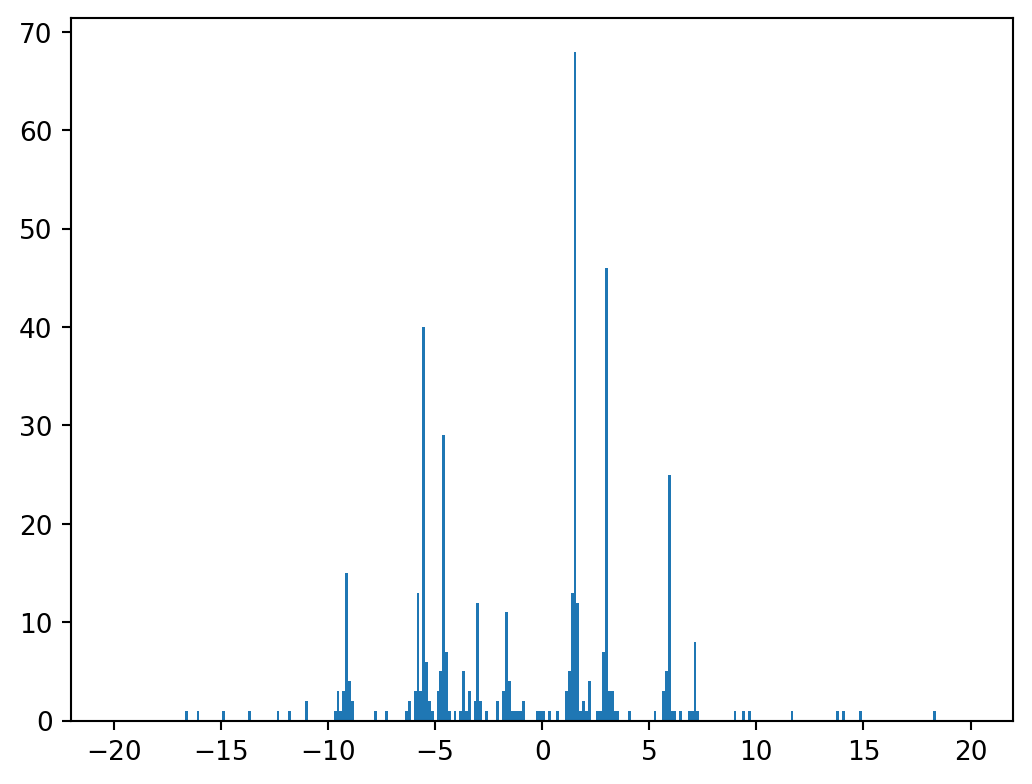

In [49]:
# Convert awkward array to numpy array
t100_np = np.concatenate(t100)

# Plot histogram of all tracks in one event
plt.figure(dpi=190)
plt.hist(t100_np, bins=300, range=[-20, 20])

In [50]:
# Normalize the tracks data  ##Opcional
#max_value = np.max(np.abs(t100_np)) 
#tracks_reshaped = t100_np / max_value
tracks_reshaped = t100_np
# Convert tracks to numpy array
tracks_reshaped = np.array(tracks_reshaped)

# Train the autoencoder
epochs = 10
batch_size = 64
history = model.fit(tracks_reshaped, tracks_reshaped, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Generate reconstructed tracks
reconstructed_tracks = model.predict(tracks_reshaped)



Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.1873 - mse: 91.1873 - val_loss: 1543.2211 - val_mse: 1543.2211
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 88.9223 - mse: 88.9223 - val_loss: 1528.6571 - val_mse: 1528.6571
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86.1677 - mse: 86.1677 - val_loss: 1516.4806 - val_mse: 1516.4806
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.9179 - mse: 91.9179 - val_loss: 1505.2765 - val_mse: 1505.2765
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.8306 - mse: 91.8306 - val_loss: 1494.4475 - val_mse: 1494.4475
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 87.1946 - mse: 87.1946 - val_loss: 1483.8086 - val_mse: 1483.8086
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.9286 - mse: 85.9286 - val_loss: 1473.0676 - val_mse: 1473.0676
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.3688 - mse: 89.3688 - val_loss: 1462.0166 - val_mse: 1462.0166
Epoch 9/10
7/7 ━━━━━━━━━

In [53]:
tesize = len(tracks_reshaped)
print(tesize)

452


In [54]:
# Calculate recontruction error
#reconstruction_error = np.mean(np.square(tracks_reshaped - reconstructed_tracks))
#print('Reconstruction MSE for Autoencoder is {:.4f}'.format(reconstruction_error))
# Calcular el error de reconstrucción por lotes
batch_size = 64
num_samples = tracks_reshaped.shape[0]
total_batches = (num_samples + batch_size - 1) // batch_size  # Redondeo hacia arriba


reconstruction_errors = []
for i in range(total_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, num_samples)
    
    batch_tracks = tracks_reshaped[start_idx:end_idx]
    batch_reconstructed_tracks = model.predict(batch_tracks)
    
    batch_error = np.mean(np.square(batch_tracks - batch_reconstructed_tracks))
    reconstruction_errors.append(batch_error)

# Calcular el error de reconstrucción total
total_reconstruction_error = np.mean(reconstruction_errors)
print('Reconstruction MSE for Autoencoder is {:.4f}'.format(total_reconstruction_error))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Reconstruction MSE for Autoencoder is 558.6282


In [55]:
tesize = len(batch_reconstructed_tracks)
print(num_samples)

452


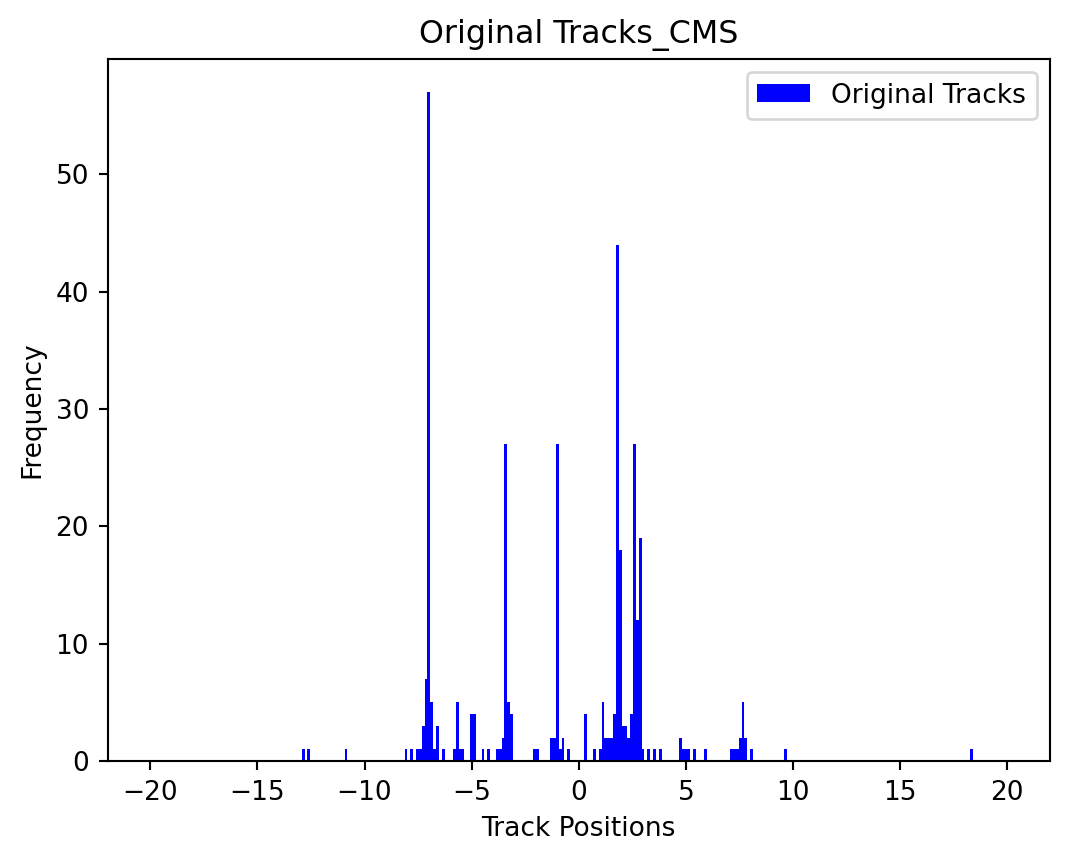

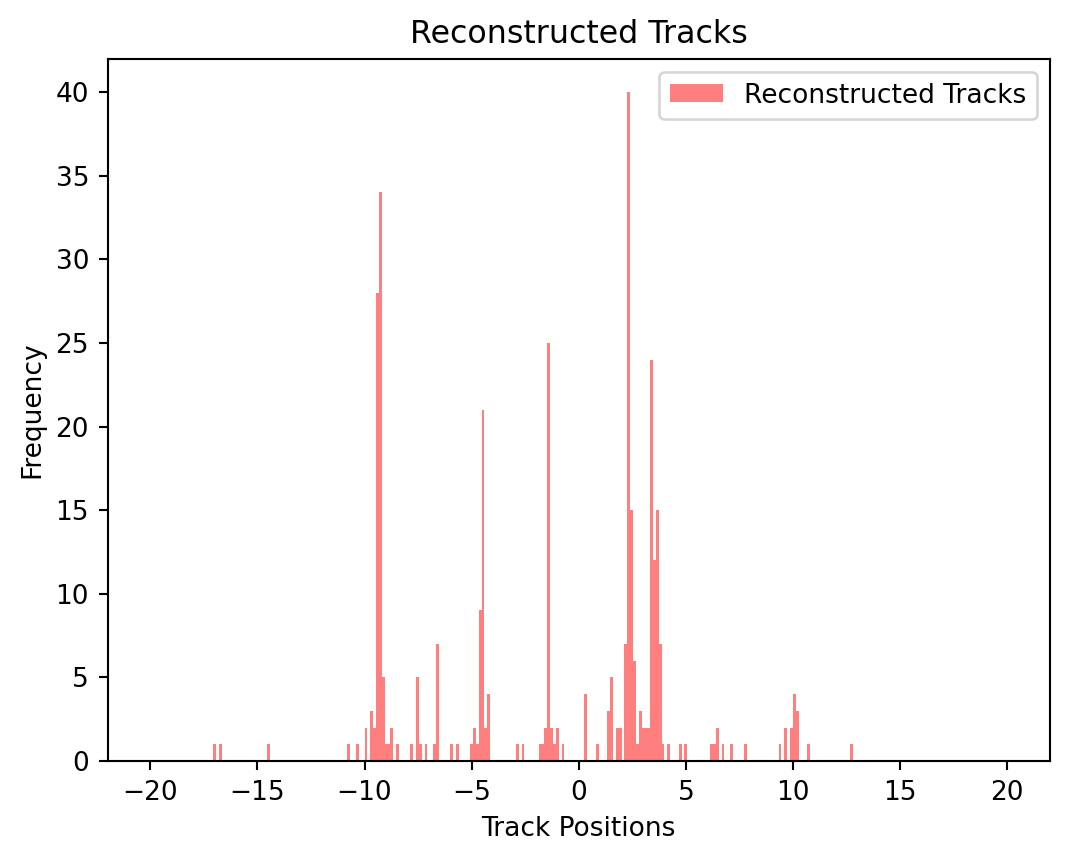

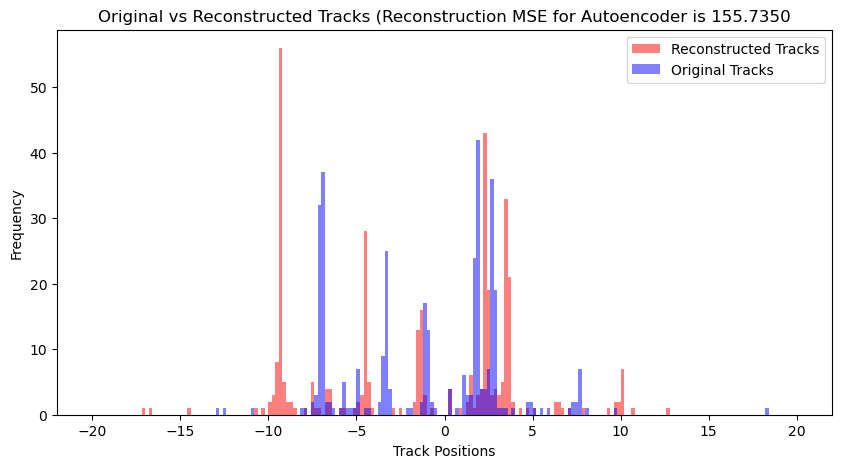

In [57]:
# Plot histogram to compare original tracks and reconstructed tracks
fig1 = plt.figure(dpi=190)
plt.hist(tracks_reshaped, bins=300, range=[-20, 20], color='blue', label='Original Tracks')
#plt.hist(reconstructed_tracks, bins=300, range=[-20, 20], alpha=0.5, color='red', label='Reconstructed Tracks')
plt.xlabel('Track Positions')
plt.ylabel('Frequency')
plt.title('Original Tracks_CMS')
plt.legend()
plt.show()

# Plot histogram to compare original tracks and reconstructed tracks
fig2 = plt.figure(dpi=190)
#plt.hist(tracks_reshaped, bins=300, range=[-20, 20], color='blue', label='Original Tracks')
plt.hist(reconstructed_tracks, bins=300, range=[-20, 20], alpha=0.5, color='red', label='Reconstructed Tracks')
plt.xlabel('Track Positions')
plt.ylabel('Frequency')
plt.title('Reconstructed Tracks')
plt.legend()
plt.show()

# Plot original tracks and reconstructed tracks
fig3 = plt.figure(figsize=(10, 5))
plt.hist(reconstructed_tracks, bins=200, range=[-20, 20], color='red', alpha=0.5, label='Reconstructed Tracks')
plt.hist(tracks_reshaped, bins=200, range=[-20, 20], color='blue',  alpha=0.5, label='Original Tracks')
plt.xlabel('Track Positions')
plt.ylabel('Frequency')
plt.title('Original vs Reconstructed Tracks (Reconstruction MSE for Autoencoder is {:.4f}'.format(total_reconstruction_error))
plt.legend()
plt.show()

In [61]:
fig2.savefig('CMS_Data_recostr-tracks.png')

In [62]:
fig3.savefig('CMS_Data_recostr_and_original-tracks.png')

In [63]:
fig1.savefig('CMS_Data_original-tracks.png')

In [134]:

tracks_reshaped


array([-0.00665683, -0.01123009, -0.01132456, ...,  0.92454181,
        0.10080122, -0.02371665])

In [135]:

tracks_reshaped.shape

(55118,)

In [136]:

reconstructed_tracks.shape


(55118, 1)